In [1]:
pip install -U kaleido

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import plotly
import plotly.express as px
import seaborn as sns; sns.set(style='whitegrid')
import matplotlib.pyplot as plt
plotly.offline.init_notebook_mode(connected=True)
import warnings; warnings.filterwarnings('ignore')

# Leer archivo desde ruta local
df = pd.read_csv(r'C:\Users\luisb\Desktop\Customer Transaction Predictive Analytics\anz_data.csv')

# Mostrar las primeras 5 filas
df.head(5)

,account,age,amount,balance,card_present_flag,customer_id,date,first_name,gender,latitude,...,txn_description,bin_age,year,month,day,hour,minute,dow,payment_period,annual_salary
0,ACC-1598451071,26,16.25,35.39,1.0,CUS-2487424745,2018-08-01,Diana,F,-27.95,...,POS,20-30,2018,8,1,1,1,Wednesday,7 days,52855.65
1,ACC-1598451071,26,14.19,21.20,0.0,CUS-2487424745,2018-08-01,Diana,F,-27.95,...,SALES-POS,20-30,2018,8,1,1,13,Wednesday,7 days,52855.65
2,ACC-1598451071,26,3.25,17.95,1.0,CUS-2487424745,2018-08-01,Diana,F,-27.95,...,SALES-POS,20-30,2018,8,1,1,51,Wednesday,7 days,52855.65
3,ACC-1598451071,26,14.10,3.85,1.0,CUS-2487424745,2018-08-01,Diana,F,-27.95,...,POS,20-30,2018,8,1,8,9,Wednesday,7 days,52855.65
4,ACC-1598451071,26,10.67,1006.85,1.0,CUS-2487424745,2018-08-01,Diana,F,-27.95,...,POS,20-30,2018,8,1,18,19,Wednesday,7 days,52855.65


In [3]:
df.T.sort_index().T.columns

Index(['account', 'age', 'amount', 'annual_salary', 'balance', 'bin_age',
       'card_present_flag', 'customer_id', 'date', 'day', 'dow', 'first_name',
       'gender', 'hour', 'latitude', 'longitude', 'merchant_code',
       'merchant_id', 'merchant_latitude', 'merchant_longitude',
       'merchant_state', 'merchant_suburb', 'minute', 'month', 'movement',
       'payment_period', 'status', 'transaction_id', 'txn_description',
       'year'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   account             12043 non-null  object 
 1   age                 12043 non-null  int64  
 2   amount              12043 non-null  float64
 3   balance             12043 non-null  float64
 4   card_present_flag   7717 non-null   float64
 5   customer_id         12043 non-null  object 
 6   date                12043 non-null  object 
 7   first_name          12043 non-null  object 
 8   gender              12043 non-null  object 
 9   latitude            12043 non-null  float64
 10  longitude           12043 non-null  float64
 11  merchant_code       883 non-null    float64
 12  merchant_id         7717 non-null   object 
 13  merchant_latitude   7717 non-null   float64
 14  merchant_longitude  7717 non-null   float64
 15  merchant_state      7717 non-null   object 
 16  merc

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,12043.0,30.582330,10.046343,18.000000,22.000,28.000,38.000,78.000
amount,12043.0,187.933588,592.599934,0.100000,16.000,29.000,53.655,8835.980
balance,12043.0,14704.195553,31503.722652,0.240000,3158.585,6432.010,12465.945,267128.520
card_present_flag,7717.0,0.802644,0.398029,0.000000,1.000,1.000,1.000,1.000
latitude,12043.0,-38.164347,54.622791,-573.000000,-37.700,-33.890,-30.750,-12.370
longitude,12043.0,143.648563,16.669352,114.620000,138.690,145.230,151.220,255.000
merchant_code,883.0,0.000000,0.000000,0.000000,0.000,0.000,0.000,0.000
merchant_latitude,7717.0,-32.752651,5.282423,-43.310000,-37.710,-33.840,-29.440,-12.330
merchant_longitude,7717.0,143.433277,12.090074,113.830000,144.680,145.830,151.210,153.610
year,12043.0,2018.000000,0.000000,2018.000000,2018.000,2018.000,2018.000,2018.000


In [6]:
print(df['txn_description'].value_counts())
mdf = dict(tuple(df.groupby('txn_description')))['PAY/SALARY']

txn_description
SALES-POS     3934
POS           3783
PAYMENT       2600
PAY/SALARY     883
INTER BANK     742
PHONE BANK     101
Name: count, dtype: int64


In [8]:
!pip install missingno


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


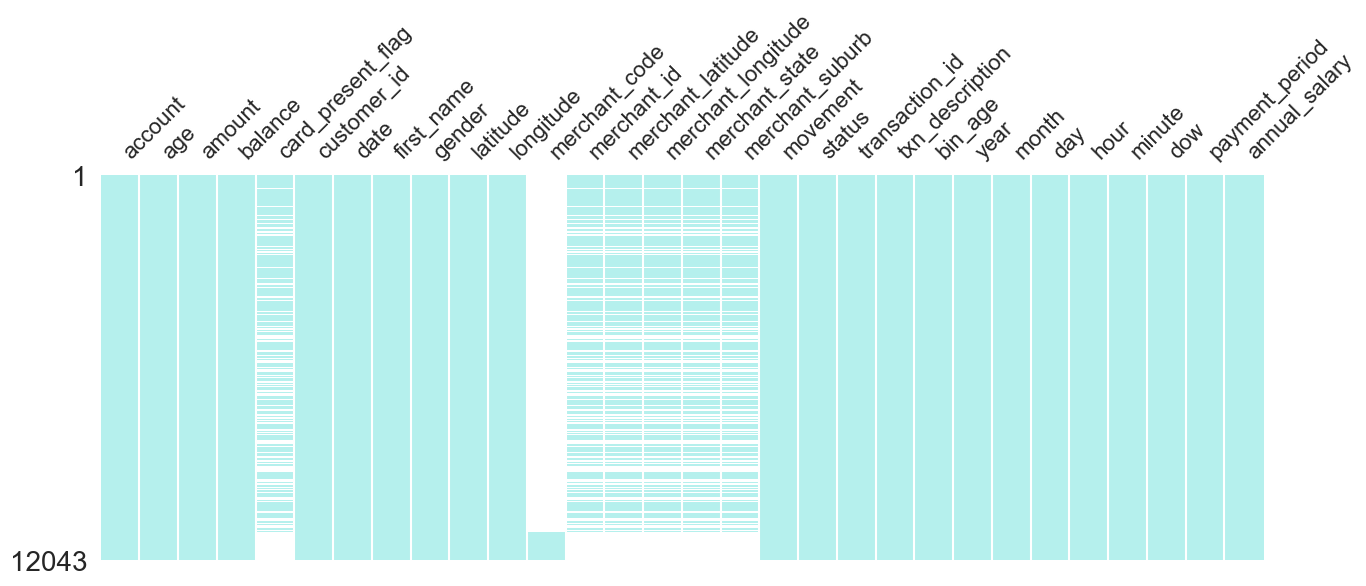

In [9]:
import missingno as msno
import matplotlib.pyplot as plt

fig = msno.matrix(df, sparkline=False, figsize=(15, 5),
                  color=(181/255, 240/255, 237/255))
plt.show()

We can notice some patterns in features card_present_flag, merchant_id, merchant_longitude, merchant_state & merchant_suburb
The heamap confirms that rows of data missing in card_present_flag is the same as merchant features with the exception for merchant_code
❯❯ FEATURE INSPECTION
❯❯❯ DROP UNINFORMATIVE COLUMNS
Dropping non informative features:

Let's start with features that don't differ country and currency
All transactions are made in Australia and are in AUD (ie. only domestic transactions are included)
Geographically transactions can in different states of Australia
# display(df['country'].value_counts())
# display(df['currency'].value_counts())
# df = df.drop(['country','currency'],axis=1)
❯❯❯ VALUE COUNT INSPECTION
No feature information is provided, this space is used for jottng some exploration, thoughts etc,

Let's check the unique values in each column & try to understand our data

merchant_code merchant code identification
merchant_id merchant identifier (106e1272-44ab-4dcb-a438-dd98e0071e51 is most common)
merchant_latitude latitude of the merchant (most common -37.82)
merchant_longitude longitude of the merchant (most common 151.21)
merchant_state state in which it is located (NSW is most common)
merchant_suburb the specific suburb in which it is located (Melbourne is most common)
amount transation amount, most are quite small (33,39,29,36 & 45) AUD were most common
movement type of transaction, credit or debit (debit are related to spending, credit related to salary payments)
status transaction status, perhaps some transactions haven't been approved (posted)
transaction_id unique identifier for each transaction made
txn_description category of payments
card_present_flag likely indicates whether the payment went through virtually or physically
date data on which the transaction was made, busiest was 9/28/2018
extraction another date, perhaps the exact time is included (but needs to be extracted), as opposed to just the date
bpay_biller_code; bpay typically have a unique value:
long_lat; perhaps the location associated with the transaction ( we also have merchant_long & merchant_latitude, perhaps there will be a connection there): if it is done in person, both should coincide? & if online, the merchant will be a bank office (something we should investigate)
account account number, the dataset contains a total of 100 unique bank accounts & their transactions
customer_id 100 unique customer identifiers
first_name The most common first name associated with the transactions was Michael
age most transactions were made by 26 years olds
balance perhaps the balance before the transaction took place, or perhaps after, the former makes slightly more sence
gender most transactions made by males
# # Merchant Related Columns
# merchs = [s for s in list(df.columns) if 'merchant' in s]

# for i in merchs:
#     print(f'Features: {i}')
#     display(df[i].value_counts())
#     print('\n','-'*79,'\n')

# # Transaction related features
# trans = ['amount','movement','status','transaction_id','txn_description',
#          'card_present_flag','date']

# for i in trans:
#     print(f'feature: {i}')
#     display(df[i].value_counts())
#     print('\n','-'*79,'\n')

# # Account User Related Features
# cus = ['account','customer_id','first_name','age','balance','gender']

# for i in cus:
#     print(f'feature: {i}')
#     display(df[i].value_counts())
#     print('\n','-'*79,'\n')
❯❯ PREPARE DATA FOR DOWNSTREAM TASKS
Let's prepare data for the exploratory data analysis, where we will explore debit payments df_deb
For annual salary deduction, we will be utilising txn_description, storing the subset in salary

In [10]:
# Debit Transactions
df_deb = df[df.movement=='debit']

# Credit Transactions (salary payments)
df_credit = df[df.movement == 'credit']

# Load the salary data
txn = dict(tuple(df.groupby('txn_description')))
txn.keys()

dict_keys(['INTER BANK', 'PAY/SALARY', 'PAYMENT', 'PHONE BANK', 'POS', 'SALES-POS'])

In [11]:
salary = txn['PAY/SALARY']

In [12]:
def plot_hist(ldf,feature,title,orient='v',height=350):

    if(orient is 'h'):
        fig = px.histogram(ldf[feature],nbins=100,template='plotly_white',
                            marginal="box",
                           title=title,orientation='h',height=height)
    elif(orient is 'v'):
        fig = px.histogram(ldf[feature],nbins=100,template='plotly_white',
                           marginal="box",
                           title=title,orientation='v',height=height)
    
    fig.update_traces(marker_color='#15C3BA',marker_line_color="white")
    fig.update_traces(marker_color='#15C3BA', 
                  marker_line_color='white',
                  marker_line_width=1.5,
                  opacity=0.25)
    fig.show('png',dpi=300)

In [15]:
print(df.dtypes)

account                object
age                     int64
amount                float64
balance               float64
card_present_flag     float64
customer_id            object
date                   object
first_name             object
gender                 object
latitude              float64
longitude             float64
merchant_code         float64
merchant_id            object
merchant_latitude     float64
merchant_longitude    float64
merchant_state         object
merchant_suburb        object
movement               object
status                 object
transaction_id         object
txn_description        object
bin_age                object
year                    int64
month                   int64
day                     int64
hour                    int64
minute                  int64
dow                    object
payment_period         object
annual_salary         float64
dtype: object


In [16]:
# Asegúrate de que 'age' sea de tipo numérico
df['age'] = pd.to_numeric(df['age'], errors='coerce')

# Agrupa por cliente y calcula solo el promedio de la columna 'age'
ldf = df.groupby('customer_id')['age'].mean().to_frame()

# Mostrar
print(ldf.head())

                 age
customer_id         
CUS-1005756958  53.0
CUS-1117979751  21.0
CUS-1140341822  28.0
CUS-1147642491  34.0
CUS-1196156254  34.0


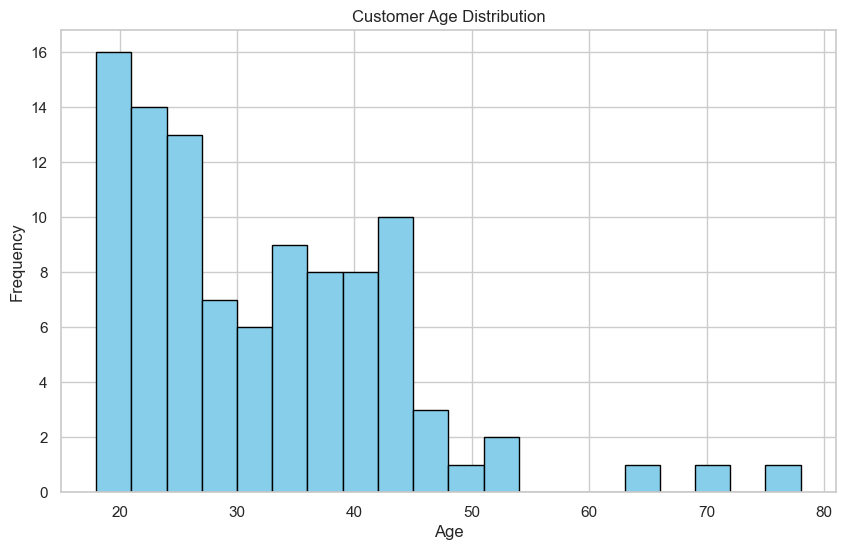

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(ldf['age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [22]:
import plotly.express as px
import pandas as pd

# Asegurarte de que 'age' esté limpia
df['age'] = pd.to_numeric(df['age'], errors='coerce')
df_clean = df.dropna(subset=['age'])

# Crear el gráfico con boxplot + histograma
fig = px.histogram(df_clean, x='age', marginal='box', nbins=30, 
                   color_discrete_sequence=['#a1dedb'])

fig.update_layout(
    title='Customer Age Distribution',
    xaxis_title='Edad',
    yaxis_title='Cantidad',
    bargap=0.05
)

fig.show()

In [4]:
import pandas as pd

df = pd.read_csv(r'C:\Users\luisb\Desktop\Customer Transaction Predictive Analytics\anz_data.csv')

In [5]:
df.head(3)

,account,age,amount,balance,card_present_flag,customer_id,date,first_name,gender,latitude,...,txn_description,bin_age,year,month,day,hour,minute,dow,payment_period,annual_salary
0,ACC-1598451071,26,16.25,35.39,1.0,CUS-2487424745,2018-08-01,Diana,F,-27.95,...,POS,20-30,2018,8,1,1,1,Wednesday,7 days,52855.65
1,ACC-1598451071,26,14.19,21.20,0.0,CUS-2487424745,2018-08-01,Diana,F,-27.95,...,SALES-POS,20-30,2018,8,1,1,13,Wednesday,7 days,52855.65
2,ACC-1598451071,26,3.25,17.95,1.0,CUS-2487424745,2018-08-01,Diana,F,-27.95,...,SALES-POS,20-30,2018,8,1,1,51,Wednesday,7 days,52855.65


In [8]:
import pandas as pd

# Ruta local a tu archivo CSV
file_path = r'C:\Users\luisb\Desktop\Customer Transaction Predictive Analytics\anz_data.csv'

# Cargar el archivo
df = pd.read_csv(file_path)

# Verifica que se haya cargado
print(df.columns.tolist())

['account', 'age', 'amount', 'balance', 'card_present_flag', 'customer_id', 'date', 'first_name', 'gender', 'latitude', 'longitude', 'merchant_code', 'merchant_id', 'merchant_latitude', 'merchant_longitude', 'merchant_state', 'merchant_suburb', 'movement', 'status', 'transaction_id', 'txn_description', 'bin_age', 'year', 'month', 'day', 'hour', 'minute', 'dow', 'payment_period', 'annual_salary']


In [9]:
import plotly.express as px

def plot_vcounts_groupby(ldf, gr_feature, feature, top=10, return_id=True,
                         orient='x', title=None, height=500):

    if gr_feature not in ldf.columns or feature not in ldf.columns:
        raise ValueError(f"Las columnas '{gr_feature}' o '{feature}' no existen en el DataFrame")

    value_counts_s = ldf.groupby(gr_feature).first()[feature].value_counts()
    value_counts_f = value_counts_s.to_frame().reset_index()
    value_counts_f.columns = [feature, 'count']

    if top:
        value_counts_f = value_counts_f.head(top)

    if orient == 'h':
        fig = px.bar(value_counts_f, x='count', y=feature, orientation='h',
                     height=height, title=title, template='plotly_white')
    else:
        fig = px.bar(value_counts_f, x=feature, y='count', orientation='v',
                     height=height, title=title, template='plotly_white')

    fig.update_traces(marker_color='#15C3BA',
                      marker_line_color='white',
                      marker_line_width=1.5,
                      opacity=0.85)

    fig.show()

    if return_id:
        return value_counts_f

In [10]:
vc = plot_vcounts_groupby(df, 'customer_id', 'first_name',
                          orient='h', top=10, title='Top nombres de clientes', height=400)

In [7]:
plot_vcounts_groupby(df,'customer_id','gender',
                     orient='v',title='title',height=400,return_id=False)

We can see that a large portion of customer demographic is in the age group (19-21) years old
Only a handful of customers are of age 50+ years old (three outliers 64, 69 & 78) years old
Michael, Kimberley and Richard are the most commond first names of Customers
We have a little more male customers than females (56 to 44)
❯❯ CUSTOMER ID RELATION TO ACCOUNT ID
We have both account ID & customer ID, a customer can have multiple accounts in theory, lets take a look

In [11]:
find_id = 0
for i in dict(tuple(df.groupby(['customer_id']))):
    n = dict(tuple(df.groupby(['customer_id'])))[i]['account'].value_counts().shape[0]
    if(n > 1):
        find_id = 1
        
if(find_id == 1):
    print('customer_id with multiple accounts found')
else:
    print('all customer_id have unique account')

all customer_id have unique account


❯❯ CUSTOMER AND MERCHANT LOCATION¶
❯❯❯ UNIQUE MERCHANT STATE ALLOCATIONS
Most of our customers have made purchases using merchants located in at least one state

this simply means that purchases have been assigned merchants located in multiple states

In [13]:
purchase_states = df.groupby(by=['customer_id','merchant_state']).agg('sum')[['amount']].reset_index().groupby('customer_id').agg('count')['merchant_state']
fig = px.area(purchase_states,
              markers=True,
              template='plotly_white',
              color_discrete_sequence=['#15C3BA'])
fig.show()

❯❯❯ PURCHASE LOCATION
Despite being allocated merchants in different locations, all customers have made purchases in the same state
Lets check how many transactions have the same purchase and merchant location

In [31]:
ldf = df_deb[['customer_id','longitude','latitude','merchant_longitude','merchant_latitude']]
ldf['purchase'] = (ldf['longitude']**2 + ldf['latitude']**2)**0.5
ldf['merchant'] = (ldf['merchant_longitude']**2 + ldf['merchant_latitude']**2)**0.5
ldf['same'] = ldf['purchase'] == ldf['merchant']
print(ldf['same'].value_counts())

customer_purchases = dict(tuple(ldf.groupby(by='customer_id')))

Series([], Name: count, dtype: int64)


In [33]:
import pandas as pd
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'notebook'

# 1. Cargar el archivo CSV
df = pd.read_csv(r'C:\Users\luisb\Desktop\Customer Transaction Predictive Analytics\anz_data.csv')

# 2. Filtrar transacciones tipo DEBIT
df_deb = df[df['txn_description'] == 'DEBIT']

# 3. Calcular ubicación del cliente y comercio
ldf = df_deb[['customer_id', 'longitude', 'latitude', 'merchant_longitude', 'merchant_latitude']].copy()
ldf['purchase'] = (ldf['longitude']**2 + ldf['latitude']**2)**0.5
ldf['merchant'] = (ldf['merchant_longitude']**2 + ldf['merchant_latitude']**2)**0.5
ldf['same'] = ldf['purchase'] == ldf['merchant']

# 4. Verificar cuántas veces coincide ubicación
print("\n¿Cliente y comercio en el mismo punto?")
print(ldf['same'].value_counts())

# 5. Filtrar solo los casos donde son iguales
ldf_same = ldf[ldf['same'] == True]

# 6. Contar cuántas veces cada cliente compró en su misma ubicación
same_counts = ldf_same['customer_id'].value_counts()

# 7. Mostrar resultado
print("\nClientes con compras en su misma ubicación:")
print(same_counts)

# 8. Graficar (si hay datos)
if not same_counts.empty:
    fig = px.bar(same_counts,
                 title='Compras donde cliente y comercio están en la misma ubicación',
                 labels={'index': 'customer_id', 'value': 'n coincidencias'},
                 template='plotly_white',
                 color_discrete_sequence=['#15C3BA'])
    fig.show()
else:
    print("No hay coincidencias para graficar.")



¿Cliente y comercio en el mismo punto?
Series([], Name: count, dtype: int64)

Clientes con compras en su misma ubicación:
Series([], Name: count, dtype: int64)
No hay coincidencias para graficar.


In [6]:
import plotly.express as px

def plot_hist(df, feature, title=None, orient='v', height=400, color='#636EFA'):
    """
    Crea un histograma simple con Plotly.
    
    Parámetros:
    - df: DataFrame de entrada
    - feature: columna a graficar
    - title: título del gráfico
    - orient: 'v' para vertical, 'h' para horizontal
    - height: altura del gráfico
    - color: color de las barras
    """
    if orient == 'h':
        fig = px.histogram(df, y=feature, title=title, template='plotly_white',
                           color_discrete_sequence=[color])
    else:
        fig = px.histogram(df, x=feature, title=title, template='plotly_white',
                           color_discrete_sequence=[color])
    
    fig.update_layout(height=height)
    fig.show()

In [5]:
plot_hist(df, 'movement', title='Movement', orient='h', height=300)

NameError: name 'df' is not defined

❯ TRANSACTION STATUS
Transaction status can be divided into two groups authorised & posted
Authorised by virtue of its name is quite straightforward; a merchant has also been allocated for the transaction


In [40]:
plot_hist(df,'status','Transaction Status',orient='h')

In [42]:
print(f"Number of merchant_id values missing in authorised transactions: {dict(tuple(df.groupby('status')))['authorized']['merchant_id'].isna().sum()}")

Number of merchant_id values missing in authorised transactions: 0


❯❯ TRANSACTION DESCRIPTION
Rows with posted payments are of type, PAYMENT, PAY/SALARY, INTER BANK, PHONE BANK
We can also clearly see that for these payments a merchant has not been allocated
Perhaps these payments are longer to process compared to typical EFTPOS terminals

In [60]:
import pandas as pd

# Usar r"" para evitar problemas con \U, \t, etc.
df = pd.read_csv(r'C:\Users\luisb\Desktop\Customer Transaction Predictive Analytics\anz_data.csv')

In [62]:
import pandas as pd
import plotly.express as px

# Cargar datos
df = pd.read_csv(r'C:\Users\luisb\Desktop\Customer Transaction Predictive Analytics\anz_data.csv')

# Verifica el nombre real de la columna
print("📌 Columnas disponibles:")
print(df.columns.tolist())

📌 Columnas disponibles:
['account', 'age', 'amount', 'balance', 'card_present_flag', 'customer_id', 'date', 'first_name', 'gender', 'latitude', 'longitude', 'merchant_code', 'merchant_id', 'merchant_latitude', 'merchant_longitude', 'merchant_state', 'merchant_suburb', 'movement', 'status', 'transaction_id', 'txn_description', 'bin_age', 'year', 'month', 'day', 'hour', 'minute', 'dow', 'payment_period', 'annual_salary']


In [7]:
import pandas as pd
import plotly.express as px

# 1. Cargar el archivo
df = pd.read_csv(r'C:\Users\luisb\Desktop\Customer Transaction Predictive Analytics\anz_data.csv')

# 2. Filtrar los tipos de transacción deseados
target_types = ['SALES-POS', 'POS', 'PAYMENT', 'PAY/SALARY', 'INTER BANK', 'PHONE BANK']
filtered_df = df[df['txn_description'].isin(target_types)]

# 3. Contar ocurrencias
value_counts = filtered_df['txn_description'].value_counts().to_frame(name='Count')
value_counts.index.name = 'Transaction Type'

# 4. Graficar
fig = px.bar(value_counts,
             title="Frecuencia de Tipos de Transacción",
             template='plotly_white',
             height=400)

fig.update_traces(marker_color='#15C3BA',
                  marker_line_color='white',
                  marker_line_width=1.5,
                  opacity=0.8)

fig.show()

❯ PRESENCE OF CARD DURING PAYMENT
We have a feature called card_present_flag, whilst we did see some patterns earlier relating to this feature

There doesn't tend to be any visible variation between (0,1) values, however does exist for NaN:

txn_description for both is the same (POS-PAY,PAY), status for both is authorised
txn_description for subset that contains no card present flag (NaN) is of type (PAYMENT,SALARY,INTERNET,PHONE)
merchant_code is missing for both & other merchant features are available for both (0,1)


Some hyptheses about relation of 0/1 labels:

Typically EFTPOS readers have a passcode protection for purchases below a certain threshold, below which you don't need to enter your passcode (touch & go)
However as the histogram below shows, this doesn't tend to be the difference either, as we have amount > 4000 AUD for both flags
Another possible variant is more logical, it is associated with the introduction of phone based payment systems - ANZ digital wallets (Eg. Apple Pay or QR code based payments etc)
Such technology is probably more common amongst younger demographic & since we have age groups
Upon finding the mean for each card_present_flag subgroup, it was noted that the mean age is actually almost the same
So the question still remains, we'll have to look at the correlation between features later on, perhaps there may be something we have missed

In [66]:
!pip install Jinja2


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [75]:
print(df['card_present_flag'].unique())
print(df['card_present_flag'].value_counts(dropna=False))

[ 1.  0. nan]
card_present_flag
1.0    6194
NaN    4326
0.0    1523
Name: count, dtype: int64


In [8]:
import pandas as pd
import plotly.express as px

col = df['card_present_flag'].fillna('NaN').astype(str)

categories = ['0.0', 'NaN', '1.0']
counts = col.value_counts().reindex(categories, fill_value=0).reset_index()
counts.columns = ['card_present_flag', 'count']

counts['card_present_flag'] = pd.Categorical(counts['card_present_flag'],
                                             categories=categories,
                                             ordered=True)

fig = px.bar(counts,
             x='count',
             y='card_present_flag',
             orientation='h',
             title='Presencia de Tarjeta (0, NaN, 1)',
             template='plotly_white',
             text='count',
             color='card_present_flag',
             color_discrete_map={
                 '0.0': '#2F4F4F',  # Dark Slate Gray
                 'NaN': '#708090',  # Slate Gray
                 '1.0': '#4682B4'   # Steel Blue
             })

fig.update_traces(marker_line_color='white',
                  marker_line_width=1.5,
                  opacity=0.9,
                  textposition='outside')

fig.update_layout(
    xaxis_title='Frecuencia',
    yaxis_title='¿Tarjeta presente?',
    showlegend=False,
    height=400
)

fig.show()



In [81]:
ldf = df.copy()
ldf['card_present_flag'] = df['card_present_flag'].fillna(-1)

grouped = dict(tuple(ldf.groupby(['card_present_flag'])))

# NaN (convertido a -1)
if -1 in grouped:
    print('📌 No Card Present Flag Information Available')
    display(grouped[-1]['txn_description'].value_counts())
else:
    print('No missing card_present_flag data.')

print('\n📌 Card Present Flag Activated')
if 1.0 in grouped:
    display(grouped[1.0]['txn_description'].value_counts())
else:
    print('No data for card_present_flag = 1')

print('\n📌 Card Present Flag Non Activated')
if 0.0 in grouped:
    display(grouped[0.0]['txn_description'].value_counts())
else:
    print('No data for card_present_flag = 0')

No missing card_present_flag data.

📌 Card Present Flag Activated
No data for card_present_flag = 1

📌 Card Present Flag Non Activated
No data for card_present_flag = 0


In [9]:
import pandas as pd
import plotly.express as px

# Construimos manualmente el DataFrame combinado a partir de tus resultados
data = {
    'txn_description': ['PAYMENT', 'PAY/SALARY', 'INTER BANK', 'PHONE BANK', 'SALES-POS', 'POS'],
    'card_present_flag': ['NaN', 'NaN', 'NaN', 'NaN', 'Present', 'Present'],
    'count': [2600, 883, 742, 101, 3169 + 3169, 3025 + 3025]  # Sumas de activado + no activado
}

df_plot = pd.DataFrame(data)

# Graficamos
fig = px.bar(df_plot,
             x='count',
             y='txn_description',
             color='card_present_flag',
             orientation='h',
             text='count',
             title='Transacciones por Tipo y Presencia de Tarjeta',
             template='plotly_white',
             color_discrete_map={
                 'NaN': '#708090',      # Slate Gray
                 'Present': '#4682B4'   # Steel Blue
             })

# Ajustes visuales
fig.update_traces(marker_line_color='white',
                  marker_line_width=1.5,
                  textposition='outside',
                  opacity=0.9)

fig.update_layout(
    xaxis_title='Cantidad',
    yaxis_title='Descripción de Transacción',
    legend_title='¿Tarjeta Presente?',
    height=450
)

fig.show()

In [83]:
mdf = dict(tuple(df.groupby('card_present_flag')))
print(mdf.keys())

dict_keys([0.0, 1.0])


In [84]:
pd.set_option('display.max_columns', None)

display(mdf[0.0].head())
mdf[0.0]['txn_description'].value_counts()

,account,age,amount,balance,card_present_flag,customer_id,date,first_name,gender,latitude,longitude,merchant_code,merchant_id,merchant_latitude,merchant_longitude,merchant_state,merchant_suburb,movement,status,transaction_id,txn_description,bin_age,year,month,day,hour,minute,dow,payment_period,annual_salary
1,ACC-1598451071,26,14.19,21.20,0.0,CUS-2487424745,2018-08-01,Diana,F,-27.95,153.41,NaN,830a451c-316e-4a6a-bf25-e37caedca49e,-33.87,151.21,NSW,Sydney,debit,authorized,13270a2a902145da9db4c951e04b51b9,SALES-POS,20-30,2018,8,1,1,13,Wednesday,7 days,52855.65
5,ACC-1598451071,26,11.28,995.57,0.0,CUS-2487424745,2018-08-01,Diana,F,-27.95,153.41,NaN,73aac058-cb31-46c2-826d-29b161bfb23e,-28.13,153.47,QLD,Elanora,debit,authorized,9a13829c885344c3ad6c6f1a2d30d1bc,SALES-POS,20-30,2018,8,1,19,33,Wednesday,7 days,52855.65
6,ACC-1598451071,26,8.99,986.58,0.0,CUS-2487424745,2018-08-01,Diana,F,-27.95,153.41,NaN,d87e2b48-3fc5-47e4-87c5-014e56e493df,-28.13,153.47,QLD,Elanora,debit,authorized,e1949cb88eb74ad1b0391347a221e938,POS,20-30,2018,8,1,21,38,Wednesday,7 days,52855.65
17,ACC-1598451071,26,2.08,702.78,0.0,CUS-2487424745,2018-08-03,Diana,F,-27.95,153.41,NaN,1f91ac18-372f-40b5-bbf8-5a3580e8fa1b,-27.68,153.24,QLD,Carbrook,debit,authorized,95dfc6684cf144ecb038265af7f1c04c,SALES-POS,20-30,2018,8,3,11,4,Friday,7 days,52855.65
24,ACC-1598451071,26,30.44,557.43,0.0,CUS-2487424745,2018-08-04,Diana,F,-27.95,153.41,NaN,75b65ffc-1abf-4fae-9ab9-44a41247bb5a,-27.89,153.31,QLD,Oxenford,debit,authorized,2e019304a1bd47dc992d21255b24e165,SALES-POS,20-30,2018,8,4,9,33,Saturday,7 days,52855.65


txn_description
SALES-POS    765
POS          758
Name: count, dtype: int64

In [85]:
display(mdf[1.0].head())
mdf[1.0]['txn_description'].value_counts()

,account,age,amount,balance,card_present_flag,customer_id,date,first_name,gender,latitude,longitude,merchant_code,merchant_id,merchant_latitude,merchant_longitude,merchant_state,merchant_suburb,movement,status,transaction_id,txn_description,bin_age,year,month,day,hour,minute,dow,payment_period,annual_salary
0,ACC-1598451071,26,16.25,35.39,1.0,CUS-2487424745,2018-08-01,Diana,F,-27.95,153.41,NaN,81c48296-73be-44a7-befa-d053f48ce7cd,-27.99,153.38,QLD,Ashmore,debit,authorized,a623070bfead4541a6b0fff8a09e706c,POS,20-30,2018,8,1,1,1,Wednesday,7 days,52855.65
2,ACC-1598451071,26,3.25,17.95,1.0,CUS-2487424745,2018-08-01,Diana,F,-27.95,153.41,NaN,b4e02c10-0852-4273-b8fd-7b3395e32eb0,-28.06,153.44,QLD,Mermaid Beach,debit,authorized,329adf79878c4cf0aeb4188b4691c266,SALES-POS,20-30,2018,8,1,1,51,Wednesday,7 days,52855.65
3,ACC-1598451071,26,14.10,3.85,1.0,CUS-2487424745,2018-08-01,Diana,F,-27.95,153.41,NaN,f2ef6270-cf91-409f-a6a2-fbd6735ea500,-28.63,153.60,NSW,Byron Bay,debit,authorized,1c12c9ad77894ef8b507fb091e41e928,POS,20-30,2018,8,1,8,9,Wednesday,7 days,52855.65
4,ACC-1598451071,26,10.67,1006.85,1.0,CUS-2487424745,2018-08-01,Diana,F,-27.95,153.41,NaN,44abc19c-aa5c-40bd-b1d0-9b2f236189ea,-28.01,153.41,QLD,Bundall,debit,authorized,cd0113426970425a8524e55f4079408f,POS,20-30,2018,8,1,18,19,Wednesday,7 days,52855.65
7,ACC-1598451071,26,10.32,976.26,1.0,CUS-2487424745,2018-08-01,Diana,F,-27.95,153.41,NaN,4345dbd1-dfa8-4466-892a-4136a5ae08a2,-27.94,153.41,QLD,Labrador,debit,authorized,e9ff93190c9a4a088994e0f74b02e953,POS,20-30,2018,8,1,22,25,Wednesday,7 days,52855.65


txn_description
SALES-POS    3169
POS          3025
Name: count, dtype: int64

In [10]:
import pandas as pd
import plotly.express as px

# Asegúrate de que el DataFrame ya esté cargado. Por ejemplo:
# df = pd.read_csv('C:/Users/luisb/Desktop/Customer Transaction Predictive Analytics/anz_data.csv')

# Filtra si quieres solo transacciones de débito
df_deb = df[df['movement'] == 'debit'].copy()

# Crea la gráfica de línea
fig = px.line(
    df_deb,
    y='amount',
    color='card_present_flag',
    height=400,
    color_discrete_sequence=['#056293', '#15C3BA', '#A0A0A0'],  # colores más formales
    title='Debit Transaction Frequency'
)

# Ajustes del eje Y
fig.update_yaxes(range=[0, 10000], title_text='Frequency')

# Etiquetas y estilo
fig.update_layout(
    template='plotly_white',
    xaxis_title='Payment Value',
    showlegend=True
)

# Mostrar el gráfico directamente (sin usar SVG o PNG, así no necesitas Chrome)
fig.show()

In [91]:
import pandas as pd

# Load the CSV file into a DataFrame
file_path = r'C:\Users\luisb\Desktop\Customer Transaction Predictive Analytics\anz_data.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to understand its structure
print(df.head())

# Check the data types of the columns
print(df.dtypes)

# Convert 'age' column to numeric, if necessary
df['age'] = pd.to_numeric(df['age'], errors='coerce')

# Group by 'card_present_flag' and calculate mean age
mdf = df.groupby(['card_present_flag']).agg({'age': 'mean'})

# Optionally handle NaN values
df['age'].fillna(0, inplace=True)  # Example: fill NaN with 0

# Display the result with bar style
mdf.style.bar(align='mid', color=['#056293', '#15C3BA'])


          account  age  amount  balance  card_present_flag     customer_id  \
0  ACC-1598451071   26   16.25    35.39                1.0  CUS-2487424745   
1  ACC-1598451071   26   14.19    21.20                0.0  CUS-2487424745   
2  ACC-1598451071   26    3.25    17.95                1.0  CUS-2487424745   
3  ACC-1598451071   26   14.10     3.85                1.0  CUS-2487424745   
4  ACC-1598451071   26   10.67  1006.85                1.0  CUS-2487424745   

         date first_name gender  latitude  longitude  merchant_code  \
0  2018-08-01      Diana      F    -27.95     153.41            NaN   
1  2018-08-01      Diana      F    -27.95     153.41            NaN   
2  2018-08-01      Diana      F    -27.95     153.41            NaN   
3  2018-08-01      Diana      F    -27.95     153.41            NaN   
4  2018-08-01      Diana      F    -27.95     153.41            NaN   

                            merchant_id  merchant_latitude  \
0  81c48296-73be-44a7-befa-d053f48ce7cd   

C:\Users\luisb\AppData\Local\Temp\ipykernel_18408\370202429.py:20: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





,age
card_present_flag,
0.000000,30.212081
1.000000,30.012754


5 ❯ CREDIT TRANSACTIONS
The credit subset contains data about salary payments, so it's of interest to us for the task that we will do in Section 8



❯❯ QUARTERLY PAYMENTS
Lets check average 3 month statistics for salary payments of each of the 100 customers

We have an average monthly salary of 5588 AUD
The smallest average monthly salary was 2385 AUD
The highest average monthly salary was 117981 AUD

In [14]:
income_by_cus = df[df['movement'] == 'credit'] \
                  .groupby('customer_id')['amount'] \
                  .sum()/3

income_by_cus.describe()

count      100.000000
mean      5588.589500
std       2247.181239
min       2385.320000
25%       3863.777500
50%       4937.828333
75%       7110.838333
max      11781.306667
Name: amount, dtype: float64

❯❯ CUSTOMER SEGMENTATION BY QUARTERLY INCOME
We can note that 61/100 customers earn less than the average income salary amount of 5588 AUD
Let's create three different groups of customers: Low earning customers,Middle earning customers & High earning customers
Also let's plot the payment amount for high income & low income customers

In [15]:
print(len(income_by_cus.to_frame()[income_by_cus.to_frame()['amount']<5588]), 'customers earn below the mean value')

61 customers earn below the mean value


In [16]:
# top 30 and last 30 by monthly income average of customers
ldf = income_by_cus.sort_values(ascending=False)
ldf_max = ldf.to_frame()[:30]
ldf_min = ldf.to_frame()[-30:]
ldf_mid = ldf.to_frame()[30:70]

highest_earners = list(ldf_max.index)
middle_earners = list(ldf_mid.index)
low_earners = list(ldf_min.index)

def plist(lst,name):

    cols = 4
    # Figure out how many rows are needed
    rows, extra = divmod(len(lst), cols)
    if extra > 0:
        # That means we need one final partial row
        rows += 1

    print(name)
        
    # And show each row in turn
    for row in range(rows):
        line = ""
        for col in range(cols):
            i = col * rows + row
            if i < len(lst):
                line += f"{i:3d} {lst[i]:^14}  "
        print(line)
        
    print('\n')
    
plist(highest_earners,'Highest Earners')
plist(middle_earners,'Middle Earners')
plist(low_earners,'Low Earners')


Highest Earners
  0 CUS-1816693151    8 CUS-883482547    16 CUS-3249305314   24 CUS-1790886359  
  1 CUS-3142625864    9 CUS-1462656821   17 CUS-2663907001   25  CUS-55310383   
  2 CUS-2738291516   10 CUS-1196156254   18 CUS-1617121891   26 CUS-2059096722  
  3 CUS-2155701614   11 CUS-134833760    19 CUS-2500783281   27 CUS-3026014945  
  4 CUS-261674136    12 CUS-2376382098   20 CUS-2819545904   28 CUS-164374203   
  5 CUS-2031327464   13 CUS-2505971401   21 CUS-1147642491   29 CUS-3462882033  
  6 CUS-527400765    14 CUS-1117979751   22 CUS-3174332735  
  7 CUS-3336454548   15 CUS-4142663097   23 CUS-1478398256  


Middle Earners
  0 CUS-495599312    10 CUS-3117610635   20 CUS-127297539    30 CUS-2283904812  
  1 CUS-2317998716   11 CUS-1271030853   21 CUS-1388323263   31 CUS-2370108457  
  2 CUS-3180318393   12 CUS-325142416    22 CUS-3325710106   32 CUS-2142601169  
  3 CUS-537508723    13 CUS-3989008654   23 CUS-2487424745   33 CUS-3129499595  
  4 CUS-4023861240   14 CUS-1220154

In [17]:
import pandas as pd
import plotly.express as px

# Assuming ldf_max and ldf_min are already defined DataFrames
high = ldf_max[['amount']].round(0)
low = ldf_min[['amount']].round(0)
high['group'] = 'high'
low['group'] = 'low'
all_seg = pd.concat([high, low], axis=0)

fig = px.bar(data_frame=all_seg, color='group',
             template='plotly_white',
             color_discrete_sequence=['#056293', '#15C3BA'],
             width=1200, orientation='v',
             title='Average Income per Month')

fig.update_traces(marker_line_width=2, selector=dict(type="bar"))
fig.update_traces(textposition='outside', textfont_size=14)

# Use the default renderer to display the figure
fig.show()


❯❯ CUSTOMER PURCHASES DATASET
In this section we will focus on transactions made by customers debit transactions:

Let's now focus on debit transactions (ie. those classified as payments) we have 11160 transactions
All procurement associated transaction (in shop,online,by phone...) by are of type debit in this dataset
Extract a subset for all debit related purchases by customers using movement = debit
We focus on age wise transaction variations:
How much is spent, variation by month, variation by day of the week
Variation by hour of the day
Total Debit transaction data distribution
We'll also focus on gender wise transaction variation

❯❯ PAYMENT SUM BY AGE
Age is definitely a factor, which influences customer transactions, let's find some interesting relations in the df_deb (debit subset)

Debit payment amounts by age group tells us which age group spends the most during this period
Monthly debit transaction amount per age group tells us how much each age group spent each month


Let's stack all of the amount data for each bin_age group, to determine their total spending amount for each age category

We can note that 20-30 year old tended to spend the most over the three months, followed by 30-40 year olds
Older age groups, especially 70> year olds didn't tend to spend much


In [18]:
import pandas as pd
import plotly.express as px

# Assuming df_deb is already defined DataFrame
df_deb2 = df_deb.groupby(['bin_age']).sum()['amount']
df_deb2 = df_deb2.reset_index()

fig = px.bar(df_deb2, x='bin_age', y='amount',
             template='plotly_white', height=300)
fig.update_traces(marker_color='#15C3BA', opacity=1.0, width=0.5)
# fig.update_yaxes(range=[0, 50000])
fig.update_layout(xaxis={'dtick': 1},
                  title='Total debit payment amount (by Age)')

fig.update_traces(marker_line_width=2, selector=dict(type="bar"))
fig.update_traces(marker_color='#15C3BA',
                  opacity=0.25)
fig.update_yaxes(matches=None)

# Use the default renderer to display the figure
fig.show()


❯❯ PAYMENT SUM BY AGE & MONTH
If we break down the amount for each of the three months (aug,sept,oct) for each age group

We can see that the trend doesn't change much over this period
Except for 30-40 age group in september, which was higher than usual

In [19]:
import pandas as pd
import plotly.express as px

# Assuming df_deb is already defined DataFrame
df_deb2 = df_deb.groupby(['month', 'bin_age']).sum()['amount']
df_deb2 = df_deb2.reset_index()

fig = px.bar(df_deb2, x='bin_age', y='amount', template='plotly_white',
             facet_col='month', facet_col_wrap=3)

fig.update_traces(marker_color='#15C3BA', opacity=1.0, width=1)
fig.update_layout(title='Total Debit Payment Amount (Age & Month)', height=300)
fig.update_traces(marker_line_width=10, selector=dict(type="bar"))
fig.update_traces(marker_color='#15C3BA',
                  opacity=0.25, width=1)

# Use the default renderer to display the figure
fig.show()


❯❯ PAYMENT BY AGE & DOW
If we break down the amount by day of the week for each age group:

<20 spend more on wednesdays (14.72k) & least on mondays (8.9k)
20-30 spend more on wednesdays (37.71k) & least on mondays (26.66k)
30-40 spend more on saturdays (32.69k) & least on mondays (18.89k)
40-50 spend more on saturdays (16.2k) & least on mondays (7.8k)
50-60 spend more on wednesdays (2.68k) & least on mondays (0.64k)
60-70 spend more on thursdays (1.36k) & least on wednesdays (0.3k)
70+ spend more on fridays (0.6k) & least on tuesdays (0k)

In [20]:
import pandas as pd
import plotly.express as px

# Assuming df_deb is already defined DataFrame
df_deb2 = df_deb.groupby(['dow', 'bin_age', 'gender']).sum()['amount']
df_deb2 = df_deb2.reset_index()

fig = px.area(df_deb2, x='dow', y='amount',
              color='gender',
              template='plotly_white',
              markers=True,
              color_discrete_sequence=['#056293', '#15C3BA'],
              facet_col='bin_age', facet_col_wrap=4, height=500,
              category_orders={'dow': ['Monday', 'Tuesday', 'Wednesday',
                                        'Thursday', 'Friday', 'Saturday',
                                        'Sunday'],
                               'bin_age': ['<20', '20-30', '30-40', '40-50', '50-60',
                                           '60-70', '70>']})

fig.update_layout(title='Total Debit Payment Amount (DoW & Age)')
fig.update_yaxes(matches=None)

# Use the default renderer to display the figure
fig.show()


❯❯ PAYMENT SUM BY AGE & HOUR
If we look at overall spending trends:

If we break down amount by hourly basis for each age group using the plotly animation function, we can clealy see a spending trend with age
For customers <20 the spending amount is not so high compared to 20-30 year old, the tendency of spending then reduces for 30-40 & 40-50 year olds
If we had more data for 60-70, it would likely show the same spending reduction trend
The highest amount of spending periods:

<20 spend more at 9 PM (7.4k) & least at 0 AM (386)
20-30 spend more at 2 PM (18.2k) & least at 0 AM (1.5k)
30-40 spend more at 9 AM (18.05k) & least at 0 AM (934)
40-50 spend more at 11 AM (10.8k) & least at 3 AM (67)
50-60 spend more at 10 AM (2.2k) & least at 0 AM (0)
60-70 spend more at 8 PM (1k) & least at 0 AM (0)
70+ spend more at 9 PM (494) & least at 0 AM (0)


In [21]:
import pandas as pd
import plotly.express as px
import numpy as np  # Import NumPy

# Assuming df_deb is already defined DataFrame
df_deb2 = df_deb.groupby(['hour', 'bin_age']).sum()['amount']
df_deb2 = df_deb2.reset_index()

fig = px.area(df_deb2, x='hour', y='amount',
              template='plotly_white',
              facet_col='bin_age',
              markers=True,
              facet_col_wrap=3,
              color_discrete_sequence=['#15C3BA'])

fig.update_traces(marker_color='#15C3BA', opacity=1.0)
fig.update_layout(title='Total Debit Payment Amount (Hour & Age)')
fig.update_xaxes(tickvals=[i for i in range(0, 24, 3)])
fig.update_traces(marker_line_width=2, selector=dict(type="bar"))

# Update x-axis tick labels for each facet
fig.update_layout(
    xaxis1_showticklabels=True, xaxis1_tickvals=np.arange(1, 24, 2),
    xaxis2_showticklabels=True, xaxis2_tickvals=np.arange(1, 24, 2),
    xaxis3_showticklabels=True, xaxis3_tickvals=np.arange(1, 24, 2)
)

fig.update_yaxes(matches=None)
fig.update_traces(marker_line_width=5, selector=dict(type="marker"))
fig.update_yaxes(matches=None)

# Use the default renderer to display the figure
fig.show()


❯❯ ACCUMULATIVE SPENDING FOR DIFFERENT DEMOGRAPHIC
Cumulative debit spending data allows us to compare total spending of different age groups at different parts of the day

In [22]:
import pandas as pd
import plotly.express as px

# Assuming df_deb is already defined DataFrame
df_deb2_sum = df_deb.groupby(['hour', 'bin_age']).sum()['amount']  # total age group spending
df_deb2_sum = df_deb2_sum.reset_index()
df_deb2_sum = df_deb2_sum.join(df_deb2_sum.groupby('bin_age').cumsum(), rsuffix="_cumsum")

fig = px.area(df_deb2_sum,
              x='hour',
              y='amount_cumsum',
              color='bin_age',
              height=400,
              template='plotly_white',
              title='Mean Accumulative Spending Throughout the Day')

# Use the default renderer to display the figure
fig.show()


20-30, 30-40 year old demographic have the highest accumulative speding
❯❯ PAYMENT DISTRIBUTION
Plot the distribution of amount transaction values for all customers

We have a very one sided/skewed data distribution, outliers starting around 100 AUD
Customers tended to make lots of small purchases as the distribution suggest 0-20 AUD

In [23]:
import pandas as pd
import plotly.express as px

# Assuming df_deb is already defined DataFrame
fig = px.histogram(df_deb, x='amount',
                   color='gender',
                   marginal='box',
                   template='plotly_white',
                   title='Amount Data Distribution',
                   color_discrete_sequence=['#056293', '#15C3BA'],
                   nbins=3000, height=300)

fig.update_layout(xaxis={'dtick': 20})
fig.update_xaxes(range=[0, 500])

# Use the default renderer to display the figure
fig.show()


❯❯ TRANSACTION FREQENCY & VOLUME BY GENDER & HOUR
❯❯❯ TRANSACTION COUNT BY GENDER & HOUR
Let's visualise the transaction count/frequency for both male & females for each of the three months

In [24]:
df2_grp= (df_deb.groupby(by=['hour','month','gender'])
              .agg(['count','sum'])[['amount']]
              .reset_index())

df2_grp.columns = ['hour', 'month' ,'gender',
                   'Transaction Count', 
                   'Total Transaction Amount']

In [25]:
import pandas as pd
import plotly.express as px
import numpy as np  # Ensure NumPy is imported

# Assuming df2_grp is already defined DataFrame
fig = px.area(data_frame=df2_grp,
              x='hour',
              y='Transaction Count',
              color='gender',
              facet_col='month',
              facet_col_wrap=3,
              markers=True,
              template='plotly_white',
              color_discrete_sequence=['#056293', '#15C3BA'])

fig.update_layout(height=300,
                  title='Hourly Transaction Count by Month')
fig.update_layout(xaxis1_showticklabels=True, xaxis1_tickvals=np.arange(1, 24, 2),
                  xaxis2_showticklabels=True, xaxis2_tickvals=np.arange(1, 24, 2),
                  xaxis3_showticklabels=True, xaxis3_tickvals=np.arange(1, 24, 2))

# Use the default renderer to display the figure
fig.show()

# Create the second figure
fig = px.area(data_frame=df2_grp,
              x='hour',
              y='Transaction Count',
              color='gender',
              facet_col='month',
              facet_col_wrap=3,
              markers=True,
              groupnorm='percent',
              template='plotly_white',
              color_discrete_sequence=['#056293', '#15C3BA'])

fig.update_layout(height=300,
                  title='Hourly Transaction Count by Month (Relative)')
fig.update_layout(xaxis1_showticklabels=True, xaxis1_tickvals=np.arange(1, 24, 2),
                  xaxis2_showticklabels=True, xaxis2_tickvals=np.arange(1, 24, 2),
                  xaxis3_showticklabels=True, xaxis3_tickvals=np.arange(1, 24, 2))

# Use the default renderer to display the figure
fig.show()


Males tend to be more active at night time (12am - 5am)
Purchase trends (time of transactions) tend to be very similar from month to month
❯❯❯ TRANSACTION VOLUME BY GENDER & HOUR
Let's visualise the transaction volume for both male & females for each of the three months

In [26]:
import pandas as pd
import plotly.express as px
import numpy as np  # Ensure NumPy is imported

# Assuming df2_grp is already defined DataFrame
fig = px.area(data_frame=df2_grp,
              x='hour',
              y='Total Transaction Amount',
              color='gender',
              facet_col='month',
              markers=True,
              facet_col_wrap=3,
              template='plotly_white',
              color_discrete_sequence=['#056293', '#15C3BA'])

fig.update_layout(height=300,
                  title='Hourly Transaction Amount by Month')
fig.update_layout(xaxis1_showticklabels=True, xaxis1_tickvals=np.arange(1, 24, 2),
                  xaxis2_showticklabels=True, xaxis2_tickvals=np.arange(1, 24, 2),
                  xaxis3_showticklabels=True, xaxis3_tickvals=np.arange(1, 24, 2))

# Use the default renderer to display the figure
fig.show()

# Create the second figure
fig = px.area(data_frame=df2_grp,
              x='hour',
              y='Total Transaction Amount',
              color='gender',
              facet_col='month',
              markers=True,
              groupnorm='percent',
              facet_col_wrap=3,
              template='plotly_white',
              color_discrete_sequence=['#056293', '#15C3BA'])

fig.update_layout(height=300,
                  title='Hourly Transaction Amount by Month (Relative)')
fig.update_layout(xaxis1_showticklabels=True, xaxis1_tickvals=np.arange(1, 24, 2),
                  xaxis2_showticklabels=True, xaxis2_tickvals=np.arange(1, 24, 2),
                  xaxis3_showticklabels=True, xaxis3_tickvals=np.arange(1, 24, 2))

# Use the default renderer to display the figure
fig.show()


Purchase sums (value of transactions) tend to be quite unstructured from month to month
Purchases sums at night tended to be quite hight compared to peak purchase times at 9 and 11 am
❯❯ TRANSACTION FREQUENCY & VOLUME BY GENDER & DOW
❯❯❯ TRANSACTION COUNT BY GENDER & DOW
Taking into account gender it may be of interest to notice some variation, let's first group the data & find the total number of transactions made by both genders and groupby by day of the week

In [27]:
df2_grp= (df_deb.groupby(by=['hour','dow','gender'])
                      .agg(['count','sum'])[['amount']]
                      .reset_index())

df2_grp.columns = ['hour', 'day' ,'gender',
                   'Transaction Count', 'Total Transaction Amount']

tdf = df_deb.groupby(by=['dow','gender']).count()['amount'].reset_index()

In [28]:
import pandas as pd
import plotly.express as px
import numpy as np  # Ensure NumPy is imported

# Assuming tdf is already defined DataFrame
fig = px.area(tdf, x='dow', y='amount', color='gender',
              markers=True,
              groupnorm='percent',
              template='plotly_white',
              color_discrete_sequence=['#056293', '#15C3BA'],
              category_orders={'dow': ['Monday', 'Tuesday', 'Wednesday',
                                        'Thursday', 'Friday', 'Saturday',
                                        'Sunday']},
              height=300,
              title='Total Relative Transaction Count of Both Genders')

# Use the default renderer to display the figure
fig.show()


In [29]:
import pandas as pd
import plotly.express as px
import numpy as np  # Ensure NumPy is imported

# Assuming df2_grp is already defined DataFrame
fig = px.area(data_frame=df2_grp,
              x='hour',
              y='Transaction Count',
              color='gender',
              facet_col='day',
              facet_col_wrap=3,
              markers=True,
              template='plotly_white',
              color_discrete_sequence=['#056293', '#15C3BA'],
              category_orders={'day': ['Monday', 'Tuesday', 'Wednesday',
                                        'Thursday', 'Friday', 'Saturday',
                                        'Sunday']})

fig.update_layout(height=800,
                  title='Hourly Transaction Count by DoW')

# Update x-axis tick values for each facet
for i in range(1, 10):  # Assuming you have 9 facets
    fig.update_layout(**{f'xaxis{i}_showticklabels': True, f'xaxis{i}_tickvals': np.arange(1, 24, 2)})

# Use the default renderer to display the figure
fig.show()

# Create the second figure
fig = px.area(data_frame=df2_grp,
              x='hour',
              y='Transaction Count',
              color='gender',
              facet_col='day',
              facet_col_wrap=3,
              markers=True,
              groupnorm='percent',
              template='plotly_white',
              color_discrete_sequence=['#056293', '#15C3BA'],
              category_orders={'day': ['Monday', 'Tuesday', 'Wednesday',
                                        'Thursday', 'Friday', 'Saturday',
                                        'Sunday']})

fig.update_layout(height=800,
                  title='Hourly Transaction Count by DoW (Relative)')

# Update x-axis tick values for each facet
for i in range(1, 10):  # Assuming you have 9 facets
    fig.update_layout(**{f'xaxis{i}_showticklabels': True, f'xaxis{i}_tickvals': np.arange(1, 24, 2)})

# Use the default renderer to display the figure
fig.show()


Males tend to , especially on thursdays and saturdays
Mondays through to wednesdays tend to have similar purchasing time behaviour
Purchase trends (time of transactions) tend to be very similar from month to month

In [30]:
df2_grp= (df_deb.groupby(by=['hour','dow','gender'])
              .agg(['count','sum'])[['amount']]
              .reset_index())

df2_grp.columns = ['hour', 'day' ,'gender',
                   'Transaction Count', 'Total Transaction Amount']

tdf = df_deb.groupby(by=['dow','gender']).sum()['amount'].reset_index()

In [33]:
import plotly.express as px

# Suponiendo que 'tdf' es tu DataFrame
fig = px.area(tdf, 
              x='dow', 
              y='amount', 
              color='gender',
              markers=True,
              groupnorm='percent',
              template='plotly_white',
              color_discrete_sequence=['#056293', '#15C3BA'],
              category_orders={'dow': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']},
              height=300,
              title='Total Relative Transaction Volume of Both Genders')

# Mostrar el gráfico en formato HTML
fig.show()


In [43]:
import plotly.express as px
import numpy as np
import pandas as pd

# Suponiendo que df2_grp es tu DataFrame
# Aquí hay un ejemplo de cómo podría verse tu DataFrame
# df2_grp = pd.DataFrame({
#     'hour': [1, 2, 3, 4, 5, 1, 2, 3, 4, 5],
#     'Total Transaction Amount': [100, 150, 200, 250, 300, 120, 180, 240, 260, 310],
#     'gender': ['Male', 'Male', 'Male', 'Male', 'Male', 'Female', 'Female', 'Female', 'Female', 'Female'],
#     'day': ['Monday', 'Monday', 'Monday', 'Monday', 'Monday', 'Tuesday', 'Tuesday', 'Tuesday', 'Tuesday', 'Tuesday']
# })

# Gráfico de área total
fig_total = px.area(data_frame=df2_grp,
                    x='hour',
                    y='Total Transaction Amount',
                    color='gender',
                    facet_col='day',
                    facet_col_wrap=3,
                    markers=True,
                    template='plotly_white',
                    color_discrete_sequence=['#056293', '#15C3BA'],
                    category_orders={'day': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']})

fig_total.update_layout(height=800,
                        title='Hourly Transaction Amount by DoW')

# Configuración de los ejes
for i in range(1, 10):  # Asumiendo que tienes hasta 9 facetas
    fig_total.update_layout(**{f'xaxis{i}_showticklabels': True,
                                f'xaxis{i}_tickvals': np.arange(1, 24, 2)})

# Mostrar el gráfico total
fig_total.show()

# Gráfico de área relativo
fig_relative = px.area(data_frame=df2_grp,
                        x='hour',
                        y='Total Transaction Amount',
                        color='gender',
                        facet_col='day',
                        facet_col_wrap=3,
                        markers=True,
                        groupnorm='percent',  # Normalizar a porcentaje
                        template='plotly_white',
                        color_discrete_sequence=['#056293', '#15C3BA'],
                        category_orders={'day': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']})

fig_relative.update_layout(height=800,
                           title='Hourly Transaction Amount by DoW (relative)')

# Configuración de los ejes para el gráfico relativo
for i in range(1, 10):  # Asumiendo que tienes hasta 9 facetas
    fig_relative.update_layout(**{f'xaxis{i}_showticklabels': True,
                                   f'xaxis{i}_tickvals': np.arange(1, 24, 2)})

# Mostrar el gráfico relativo
fig_relative.show()


7 ❯ CUSTOMER ANNUAL SALARY
❯❯ SALARY ESTIMATION
There are a couple of ways we can estimate the annual income

Get the total for 3 months & multiply by 4 (less accurate)
Utilise a constant payment period (more accurate)
We should also probably confirm that:

Paymenys to each customer don't change every payment period
If the payments are not constant, we should find a way to deal with this scenerio
❯❯ FINDING SALARY PAYMENT ABNORMALITIES
salary contains all the work realted transactions made to each customer, from their correponding employer, we'll use this subset to calcualte the annual salary for all 100 customers
Looks like we are quite fortunate with this dataset, as all customers receive identical payment values over the 3 month period
This simplifies our salary payment process, so we can use grouby with nth(-1), when selecting ammount

In [46]:
import pandas as pd
import numpy as np

# Generar datos de ejemplo
np.random.seed(0)  # Para reproducibilidad
accounts = [f'Account_{i}' for i in range(1, 11)]  # 10 cuentas
amounts = np.random.randint(100, 1000, size=100)  # 100 montos aleatorios

# Crear un DataFrame con 100 filas
salary = pd.DataFrame({
    'account': np.random.choice(accounts, size=100),  # Elegir aleatoriamente entre las cuentas
    'amount': amounts
})

# Agrupar por 'account' y 'amount'
acc_amm = dict(tuple(salary.groupby(['account', 'amount'])))
combinations = list(acc_amm.keys())

# Imprimir el número de combinaciones
print(f'{len(combinations)} salary payment/account combinations')


99 salary payment/account combinations


❯❯ SALARY PAYMENT PERIODS¶
Finding Payment Value Abnormalities

date or extraction contain time based data, which contains information about the periodicity of payments, from this data we will be able to extract the date when the payment was made
We'll assume that both date & extraction is made on the same day, no confirmation is made

In [49]:
import pandas as pd

# Load the DataFrame from the CSV file
file_path = r'C:\Users\luisb\Desktop\Customer Transaction Predictive Analytics\anz_data.csv'
salary = pd.read_csv(file_path)

# Check the first few rows of the DataFrame to understand its structure
print(salary.head())

# Define the function to show account transactions
def show_account_transactions(account_id):
    try:
        # Attempt to retrieve transactions for the specified account
        account_data = salary[salary['account'] == account_id]
        if account_data.empty:
            return f"Account ID '{account_id}' not found in the salary data."
        return account_data
    except KeyError:
        return "The 'account' column does not exist in the DataFrame."

# Example usage
print(show_account_transactions('ACC-414431115'))  # Replace with an actual account ID from your data


          account  age  amount  balance  card_present_flag     customer_id  \
0  ACC-1598451071   26   16.25    35.39                1.0  CUS-2487424745   
1  ACC-1598451071   26   14.19    21.20                0.0  CUS-2487424745   
2  ACC-1598451071   26    3.25    17.95                1.0  CUS-2487424745   
3  ACC-1598451071   26   14.10     3.85                1.0  CUS-2487424745   
4  ACC-1598451071   26   10.67  1006.85                1.0  CUS-2487424745   

         date first_name gender  latitude  ...  txn_description  bin_age  \
0  2018-08-01      Diana      F    -27.95  ...              POS    20-30   
1  2018-08-01      Diana      F    -27.95  ...        SALES-POS    20-30   
2  2018-08-01      Diana      F    -27.95  ...        SALES-POS    20-30   
3  2018-08-01      Diana      F    -27.95  ...              POS    20-30   
4  2018-08-01      Diana      F    -27.95  ...              POS    20-30   

   year  month  day hour minute        dow payment_period annual_salary  


Using groupby together with diff, we obtain the interval between payments
Looking at the data, we can see that most of them are done on a weekly (7 days) or fortnight (14 days) basis
Some have unusual payment dates (28,31,30), some are payed twice in one day (0 days), and a few more as shown below

In [50]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   account             12043 non-null  object 
 1   age                 12043 non-null  int64  
 2   amount              12043 non-null  float64
 3   balance             12043 non-null  float64
 4   card_present_flag   7717 non-null   float64
 5   customer_id         12043 non-null  object 
 6   date                12043 non-null  object 
 7   first_name          12043 non-null  object 
 8   gender              12043 non-null  object 
 9   latitude            12043 non-null  float64
 10  longitude           12043 non-null  float64
 11  merchant_code       883 non-null    float64
 12  merchant_id         7717 non-null   object 
 13  merchant_latitude   7717 non-null   float64
 14  merchant_longitude  7717 non-null   float64
 15  merchant_state      7717 non-null   object 
 16  merc

In [51]:
# get the payment period
salary['date'] = salary['date'].astype('datetime64[ns]')
salary['payment_period'] = salary.groupby('customer_id')['date'].diff(1)
salary['payment_period'] = salary['payment_period'].dropna()  # remove first rows
salary['payment_period'].value_counts()

payment_period
0 days      5995
1 days      3333
2 days       860
7 days       535
3 days       402
14 days      281
4 days       208
5 days       106
6 days        65
-86 days      12
-91 days      11
8 days        11
-85 days      10
9 days         9
-82 days       9
-89 days       8
-84 days       8
-83 days       7
11 days        6
-87 days       5
28 days        5
30 days        5
-88 days       5
31 days        5
-78 days       4
-90 days       4
-79 days       4
15 days        3
-75 days       2
21 days        2
-77 days       2
18 days        2
-81 days       2
29 days        2
55 days        1
16 days        1
27 days        1
10 days        1
17 days        1
12 days        1
-80 days       1
-74 days       1
32 days        1
-69 days       1
-66 days       1
61 days        1
-68 days       1
-33 days       1
-35 days       1
Name: count, dtype: int64

❯❯ FINDING ABNORMALITY SALARY PAYMENTS¶
We can investigate payment times for a handful of customers & determine the annual income manually
There aren't too many, so we can do this manually usually the show_account_transactions function, or by excluding and grouping accounts which are not 7 or 14 days payment intervals

In [53]:
# change datatype to string from datetime
salary['payment_period_str'] = salary['payment_period'].astype('str')

# groupby customer_id
customer_salary = dict(tuple(salary.groupby('customer_id')))

# Let's find customers with non constant transaction periods of either 7/14 days

lst_abnormal = [] # list of customer_id w/ slightly abnormal (manual calculate needed)
dict_abnormal = {} # dictionary that will contain the abnormal payment groupby data

for id,data in customer_salary.items():

    values_to_remove = ['7 days','14 days','NaT']
    pattern = '|'.join(values_to_remove)

    result = data.loc[~data['payment_period_str'].str.contains(pattern, case=False)]
    if(result.shape[0]>0):
        lst_abnormal.append(id)  # store the key of the abnormal payment account
        dict_abnormal[id] = data # store the abnormal key/value account data

del salary['payment_period_str']

For accounts with non standard payment times

ACC-1683215619 (0,32,0,30,0)
ACC-1217063613 (30)
ACC-1523339231 (31,29,0)
ACC-3100725361 (30)
ACC-2107684084 (28,14,14,14,14)
ACC-354106658 (30,0,31,0)
ACC-414431115 (28,14,14,14,14)
ACC-1056639002 (28,14,14,14,14)
ACC-2153562714 (31,30)
ACC-211792489 (61)
ACC-2673069055 (31)
ACC-1903037542 (28,14,14,14,14)
ACC-2970114956 (28,14,14,14,14)
ACC-2270192619 (31,29,0)

In [54]:
# Customer IDs of abnormal payment cases 
print(dict_abnormal.keys())
print(len(dict_abnormal.keys()))

dict_keys(['CUS-1005756958', 'CUS-1117979751', 'CUS-1140341822', 'CUS-1147642491', 'CUS-1196156254', 'CUS-1220154422', 'CUS-1233833708', 'CUS-1271030853', 'CUS-127297539', 'CUS-134193016', 'CUS-134833760', 'CUS-1388323263', 'CUS-1433879684', 'CUS-1462656821', 'CUS-1478398256', 'CUS-1499065773', 'CUS-1604596597', 'CUS-1609060617', 'CUS-1614226872', 'CUS-1617121891', 'CUS-164374203', 'CUS-1646183815', 'CUS-1646621553', 'CUS-1654129794', 'CUS-1669695324', 'CUS-1739931018', 'CUS-1790886359', 'CUS-1816693151', 'CUS-1842679196', 'CUS-1892177589', 'CUS-1896554896', 'CUS-1928710999', 'CUS-2031327464', 'CUS-2059096722', 'CUS-2083971310', 'CUS-2110742437', 'CUS-2142601169', 'CUS-2155701614', 'CUS-2178051368', 'CUS-2206365095', 'CUS-2283904812', 'CUS-2317998716', 'CUS-2348881191', 'CUS-2370108457', 'CUS-2376382098', 'CUS-2484453271', 'CUS-2487424745', 'CUS-2500783281', 'CUS-2505971401', 'CUS-2599279756', 'CUS-261674136', 'CUS-2630892467', 'CUS-2650223890', 'CUS-2663907001', 'CUS-2688605418', 'CUS

In [55]:
period_count = (salary[['customer_id','payment_period']]
                .drop_duplicates()
                .groupby(['customer_id'])
                .size()
                .reset_index(name='period count'))
                
period_count[period_count['period count']!=1]

# list of customer ids whose salary are calculated manually (found earlier)
strange_id = ['ACC-1683215619','ACC-1217063613','ACC-1523339231','ACC-354106658',
              'ACC-414431115','ACC-354106658','ACC-414431115','ACC-1056639002','ACC-2153562714',
              'ACC-211792489','ACC-2673069055','ACC-1903037542','ACC-2970114956','ACC-2270192619']
        
# include accounts which have non constant payment period
salary_normal_id = (salary[~salary['account']
                          .isin(strange_id)]
                          .groupby(['account'])
                          .nth(-1)
                          .reset_index())

# Find the annual salary -> amount / payment_period -> daily wage x 365 
salary_normal_id['annual_salary'] = round((salary_normal_id['amount'] / salary_normal_id['payment_period'].dt.days)*365, 3)
salary_normal_id.index = salary_normal_id['account']
del salary_normal_id['account']

# Show DataFrame of normal payment schedule customers
display(salary_normal_id.head())
print(f'Number of standard payment customers: {salary_normal_id.shape}')

,index,age,amount,balance,card_present_flag,customer_id,date,first_name,gender,latitude,...,txn_description,bin_age,year,month,day,hour,minute,dow,payment_period,annual_salary
account,,,,,,,,,,,,,,,,,,,,,
ACC-588564840,11166,23,3903.95,24451.16,NaN,CUS-1462656821,2018-10-24,Isaiah,M,-33.76,...,PAY/SALARY,20-30,2018,10,24,11,0,Wednesday,14 days,101781.554
ACC-1650504218,11180,23,1626.48,19580.32,NaN,CUS-2500783281,2018-10-31,Marissa,F,-37.93,...,PAY/SALARY,20-30,2018,10,31,12,0,Wednesday,7 days,84809.314
ACC-3326339947,11194,22,983.36,13962.29,NaN,CUS-326006476,2018-10-31,Eric,M,-33.80,...,PAY/SALARY,20-30,2018,10,31,12,0,Wednesday,7 days,51275.200
ACC-3541460373,11201,24,1408.08,5402.55,NaN,CUS-1433879684,2018-10-24,Jeffrey,M,-37.83,...,PAY/SALARY,20-30,2018,10,24,13,0,Wednesday,14 days,36710.657
ACC-2776252858,11215,43,1068.04,8859.42,NaN,CUS-4123612273,2018-10-31,Kristin,F,-37.76,...,PAY/SALARY,40-50,2018,10,31,13,0,Wednesday,7 days,55690.657


Number of standard payment customers: (88, 30)


In [56]:
# Check for incorrect values
print(f'inf values: {salary_normal_id.isin([np.inf, -np.inf]).sum().sum()}')
# salary_normal_id.loc[pd.isna(salary_normal_id["annual_salary"]), :].index # find index of nan

inf values: 0


❯❯ ABNORMAL SALARY PAYMENT CASE ANNUAL INCOME
We can investigate payment times for a handful of customers & determine the annual income manually

In [57]:

# exclude accounts which have non constant payment period
salary_abnormal_id = (salary[salary['account']
                            .isin(strange_id)]
                            .groupby(['account'])
                            .nth(-1)
                            .reset_index())

salary_abnormal_id.index = salary_abnormal_id['account']
del salary_abnormal_id['account']

# manually calculate customer's annual salary
salary_abnormal_id.loc['ACC-1683215619','annual_salary'] = (5000/30)*365
salary_abnormal_id.loc['ACC-1056639002','annual_salary'] = (3195.01/14)*365 - 3195.01/2
salary_abnormal_id.loc['ACC-1217063613','annual_salary'] = (4863.62/30)*365
salary_abnormal_id.loc['ACC-1523339231','annual_salary'] = (8835.98/30)*365 + 8835.98
salary_abnormal_id.loc['ACC-1903037542','annual_salary'] = (1808.62/14)*365 + 1808.62/2
salary_abnormal_id.loc['ACC-211792489','annual_salary'] = (4910.9/60)*365
salary_abnormal_id.loc['ACC-2153562714','annual_salary'] = (3712.56/30)*365
salary_abnormal_id.loc['ACC-2673069055','annual_salary'] = (6024.49/30)*365
salary_abnormal_id.loc['ACC-2970114956','annual_salary'] = (1433.98/14)*365 - 1433.98/2
salary_abnormal_id.loc['ACC-354106658','annual_salary'] = ((5103.51*2)/30)*365 - 5103.51
salary_abnormal_id.loc['ACC-414431115','annual_salary'] = (1630.36/14)*365 - 1433.98
salary_abnormal_id.loc['ACC-2270192619','annual_salary'] = (3026.95/30)*365 + 3026.95

# check for incorrect values
print(f'inf values: {salary_abnormal_id.isin([np.inf, -np.inf]).sum().sum()}')

inf values: 0


In [58]:
df_annual_salary = pd.concat([salary_normal_id,salary_abnormal_id],axis=0)
df_annual_salary.head()

,index,age,amount,balance,card_present_flag,customer_id,date,first_name,gender,latitude,...,txn_description,bin_age,year,month,day,hour,minute,dow,payment_period,annual_salary
account,,,,,,,,,,,,,,,,,,,,,
ACC-588564840,11166,23,3903.95,24451.16,NaN,CUS-1462656821,2018-10-24,Isaiah,M,-33.76,...,PAY/SALARY,20-30,2018,10,24,11,0,Wednesday,14 days,101781.554
ACC-1650504218,11180,23,1626.48,19580.32,NaN,CUS-2500783281,2018-10-31,Marissa,F,-37.93,...,PAY/SALARY,20-30,2018,10,31,12,0,Wednesday,7 days,84809.314
ACC-3326339947,11194,22,983.36,13962.29,NaN,CUS-326006476,2018-10-31,Eric,M,-33.80,...,PAY/SALARY,20-30,2018,10,31,12,0,Wednesday,7 days,51275.200
ACC-3541460373,11201,24,1408.08,5402.55,NaN,CUS-1433879684,2018-10-24,Jeffrey,M,-37.83,...,PAY/SALARY,20-30,2018,10,24,13,0,Wednesday,14 days,36710.657
ACC-2776252858,11215,43,1068.04,8859.42,NaN,CUS-4123612273,2018-10-31,Kristin,F,-37.76,...,PAY/SALARY,40-50,2018,10,31,13,0,Wednesday,7 days,55690.657


In [ ]:
# df_annual_salary[['payment_period','annual_salary']].to_csv('anz_salary.csv')
❯❯ ANNUAL SALARY DISTRIBUTION
Having created our target feature, let's look at the data distribution of annual_salary for the 100 customers

In [60]:
import plotly.express as px

# Assuming df_annual_salary is your DataFrame
fig = px.histogram(df_annual_salary,
                   x='annual_salary',
                   template='plotly_white',
                   color='gender',
                   color_discrete_sequence=['#056293','#15C3BA'],
                   title='Annual Salary Data Distribution',
                   marginal="box",
                   nbins=100)

fig.update_layout(title="Derived Customer's Annual Salary", height=400)

# Show the figure in HTML format
fig.show()  # No need to specify 'svg' or 'dpi'


❯❯❯ ANNUAL SALARY STATISTICS
Let's check the statistics for our calculated annual salary column



In [61]:
df_annual_salary['annual_salary'].describe()

count       100.000000
mean      67264.614406
std       25179.797984
min       29874.641667
25%       48056.536107
50%       60163.732000
75%       82336.618500
max      134946.236000
Name: annual_salary, dtype: float64

❯❯❯ LINEAR CORRELATION¶
Let's look at the pearson linear correlation for our newly created target variable labels

In [66]:
import pandas as pd
import plotly.express as px

# Load the DataFrame from the CSV file
file_path = r'C:\Users\luisb\Desktop\Customer Transaction Predictive Analytics\anz_data.csv'
df = pd.read_csv(file_path)

# Check the columns of the DataFrame
print("Columns in DataFrame:", df.columns)

# Strip any leading/trailing spaces from column names
df.columns = df.columns.str.strip()

# Check the first few rows of the DataFrame
print(df.head())

# Identify non-numeric columns
non_numeric_cols = df.select_dtypes(exclude=['number']).columns
print("Non-numeric columns:", non_numeric_cols)

# Optionally, drop non-numeric columns for correlation calculation
df_numeric = df.select_dtypes(include=['number'])

# Check if 'annual_salary' is in the numeric DataFrame
if 'annual_salary' in df_numeric.columns:
    print('Feature Correlation to Target Variable')
    corr_target = df_numeric.corr().loc[:, 'annual_salary'].to_frame().sort_values(by='annual_salary', ascending=False).iloc[1:, :]
    
    # Create a bar plot for the correlation
    fig = px.bar(corr_target, y='annual_salary',
                 template='plotly_white', height=400)
    fig.update_traces(marker_line_width=2, selector=dict(type="bar"))
    fig.update_traces(marker_color='#15C3BA', opacity=0.25)
    
    # Show the figure in HTML format
    fig.show()  # No need to specify 'svg' or 'dpi'
else:
    print("The column 'annual_salary' does not exist in the numeric DataFrame.")


Columns in DataFrame: Index(['account', 'age', 'amount', 'balance', 'card_present_flag',
       'customer_id', 'date', 'first_name', 'gender', 'latitude', 'longitude',
       'merchant_code', 'merchant_id', 'merchant_latitude',
       'merchant_longitude', 'merchant_state', 'merchant_suburb', 'movement',
       'status', 'transaction_id', 'txn_description', 'bin_age', 'year',
       'month', 'day', 'hour', 'minute', 'dow', 'payment_period',
       'annual_salary'],
      dtype='object')
          account  age  amount  balance  card_present_flag     customer_id  \
0  ACC-1598451071   26   16.25    35.39                1.0  CUS-2487424745   
1  ACC-1598451071   26   14.19    21.20                0.0  CUS-2487424745   
2  ACC-1598451071   26    3.25    17.95                1.0  CUS-2487424745   
3  ACC-1598451071   26   14.10     3.85                1.0  CUS-2487424745   
4  ACC-1598451071   26   10.67  1006.85                1.0  CUS-2487424745   

         date first_name gender  latitu

We can note that the most common salary is 50-51.99k AUD, the highest being 134-135.99k AUD and the lowest 28-29.99k AUD
We can note that mean income for males is higher than for women
We can see that annual salary is mainly correlated to user balance


8 ❯ MODEL CONSTRUCTION APPROACHES
❯❯ MODEL CONTRUCTION APPROACHES
Having conducted an EDA, we know that our dataset contain transactions for both debit (purchases) & credit (salary income)

The credit subset is important as we calculated the annual salary income based on these transaction in section x, now our goal will be to train a model that will be able to predict the annual salary for us based on a given set of features

We also found that our dataset contains transaction data for 100 customers, which is quite a small number, and the total number of transactions made by these users are around 12000, both of which are quite contrasting numbers, so we need to think about how we will approach the problem:



❯❯❯ APPROACH 1
Utilise customer_id as indicies, which implies that we need to utilise aggregate functions in order to generate some features for each client (ie. mean transaction value etc), so our maximum number of rows will be limited by 100 customers. For each row we will have a corresponding annual_income value. Simpler models should work on such a dataset better than more complex models.


❯❯❯ APPROACH 2
Utilise transaction data as it is, ie. our target variable annual_income will be repeated for each customer_id, so we will have only 100 unique values, but on the other hand we have a much larger dataset to work with, which should help more advanced models like decision_tree gain insights into our data


We'll compare both methods and see which method would work best on this set of data



9 ❯ ANNUAL SALARY PREDICTION MODEL (AGGREGATE MODEL)
❯❯ ASSEMBLING FEATURE MATRIX
CLEANING
Most features in df_annual_salary are related to individual transactions, so let's remove all unnecessary features & start creating our features
We have three months of data, annual_salary was created from constant monthly payments (as seen in Section 6.1)
SALARY PAYMENT SIZE
It's quite rational to assume that upon obtaining new data:

We'll be able to calcualte monthly income of a customer (if payments vary each time, this can become a bit messy)
Or we'll utilise a faster method; group all income & caclulate statistics of income payments for each month (mean income, median, standard deviation) [let's try this approach]

In [70]:
import pandas as pd

# Load the DataFrame from the CSV file
file_path = r'C:\Users\luisb\Desktop\Customer Transaction Predictive Analytics\anz_data.csv'
salary = pd.read_csv(file_path)

# Check the data types of the columns
print("Data types in salary DataFrame:")
print(salary.dtypes)

# Convert 'amount' to numeric, forcing errors to NaN
salary['amount'] = pd.to_numeric(salary['amount'], errors='coerce')

# Optionally, drop rows with NaN values in 'amount'
salary = salary.dropna(subset=['amount'])

# Define the features to keep in df_annual_salary
keep_features = ['age', 'customer_id', 'first_name', 'gender', 'bin_age', 'payment_period', 'annual_salary']

# Assuming df_annual_salary is already defined and contains the necessary columns
df_annual_salary = df_annual_salary[keep_features]

# Group by 'account' and calculate the mean of 'amount'
ldf = salary.groupby(['account']).agg({'amount': 'mean'}).reset_index()

# Set the index to 'account'
ldf.set_index('account', inplace=True)

# Extract the 'amount' column
amount = ldf[['amount']]

# Concatenate the amount DataFrame to df_annual_salary
df_annual_salary = pd.concat([df_annual_salary, amount], axis=1)

# Display the resulting DataFrame
print(df_annual_salary)


Data types in salary DataFrame:
account                object
age                     int64
amount                float64
balance               float64
card_present_flag     float64
customer_id            object
date                   object
first_name             object
gender                 object
latitude              float64
longitude             float64
merchant_code         float64
merchant_id            object
merchant_latitude     float64
merchant_longitude    float64
merchant_state         object
merchant_suburb        object
movement               object
status                 object
transaction_id         object
txn_description        object
bin_age                object
year                    int64
month                   int64
day                     int64
hour                    int64
minute                  int64
dow                    object
payment_period         object
annual_salary         float64
dtype: object
                age     customer_id  first_name gender

❯❯ DEBIT TRANSACTION STATISTICS¶
Other possible relations to annual_salary are number of purchases, maximum purchase check, mean check & standard deviation (ie. debit transactions statistics)
We could look at each each month & over a 3 month period as well
Suffice to say, statistics of debit purchases for each customer is quite straightforward to get, and should always be available

In [72]:
import pandas as pd

# Assuming df_deb is already defined and contains the necessary data
# Group by 'month' and create a dictionary of DataFrames
ldf = dict(tuple(df_deb.groupby(['month'])))

# Check available keys in ldf
print("Available months in ldf:", ldf.keys())

# Initialize empty DataFrames for each month
tdf_8 = pd.DataFrame()
tdf_9 = pd.DataFrame()
tdf_10 = pd.DataFrame()

# Check if month 8 exists and perform aggregation
if 8 in ldf:
    tdf_8 = ldf[8].groupby(['account']).agg(['mean', 'max', 'std'])['amount']
    tdf_8.rename({'mean': 'deb_mean_8', 'max': 'deb_max_8', 'std': 'deb_std_8'}, axis=1, inplace=True)

# Check if month 9 exists and perform aggregation
if 9 in ldf:
    tdf_9 = ldf[9].groupby(['account']).agg(['mean', 'max', 'std'])['amount']
    tdf_9.rename({'mean': 'deb_mean_9', 'max': 'deb_max_9', 'std': 'deb_std_9'}, axis=1, inplace=True)

# Check if month 10 exists and perform aggregation
if 10 in ldf:
    tdf_10 = ldf[10].groupby(['account']).agg(['mean', 'max', 'std'])['amount']
    tdf_10.rename({'mean': 'deb_mean_10', 'max': 'deb_max_10', 'std': 'deb_std_10'}, axis=1, inplace=True)

# Concatenate the results if they exist
tdf = pd.concat([tdf_8, tdf_9, tdf_10], axis=1)

# Concatenate with df_annual_salary
df_annual_salary = pd.concat([df_annual_salary, tdf], axis=1)

# Display the resulting DataFrame
print(df_annual_salary)


Available months in ldf: dict_keys([(8,), (9,), (10,)])
                age     customer_id  first_name gender bin_age payment_period  \
account                                                                         
ACC-588564840    23  CUS-1462656821      Isaiah      M   20-30        14 days   
ACC-1650504218   23  CUS-2500783281     Marissa      F   20-30         7 days   
ACC-3326339947   22   CUS-326006476        Eric      M   20-30         7 days   
ACC-3541460373   24  CUS-1433879684     Jeffrey      M   20-30        14 days   
ACC-2776252858   43  CUS-4123612273     Kristin      F   40-50         7 days   
...             ...             ...         ...    ...     ...            ...   
ACC-1683215619   38  CUS-1604596597       Barry      M   30-40         0 days   
ACC-1523339231   40  CUS-1816693151         Tim      M   30-40         0 days   
ACC-211792489    30   CUS-497688347  Jacqueline      F   20-30        61 days   
ACC-2153562714   24   CUS-423725039       Linda      

❯❯ CUSTOMER MONTHLY BALANCE
Next, we'll assume that there is a correlation between a customer's account balance and their annual_salary
Their balance is tied to each transaction made, so let's also use statistics & extract the mean, maximumum & minimum for each month

In [74]:
import pandas as pd

# Assuming df is already defined and contains the necessary data
# Group by 'month' and create a dictionary of DataFrames
ldf = dict(tuple(df.groupby(['month'])))

# Check available keys in ldf
print("Available months in ldf:", ldf.keys())

# Initialize empty DataFrames for each month
tdf_8 = pd.DataFrame()
tdf_9 = pd.DataFrame()
tdf_10 = pd.DataFrame()

# Check if month 8 exists and perform aggregation
if 8 in ldf:
    tdf_8 = ldf[8].groupby(['account']).agg(['mean', 'max', 'std'])['balance']
    tdf_8.rename({'mean': 'balance_mean_8', 'max': 'balance_max_8', 'std': 'balance_std_8'}, axis=1, inplace=True)

# Check if month 9 exists and perform aggregation
if 9 in ldf:
    tdf_9 = ldf[9].groupby(['account']).agg(['mean', 'max', 'std'])['balance']
    tdf_9.rename({'mean': 'balance_mean_9', 'max': 'balance_max_9', 'std': 'balance_std_9'}, axis=1, inplace=True)

# Check if month 10 exists and perform aggregation
if 10 in ldf:
    tdf_10 = ldf[10].groupby(['account']).agg(['mean', 'max', 'std'])['balance']
    tdf_10.rename({'mean': 'balance_mean_10', 'max': 'balance_max_10', 'std': 'balance_std_10'}, axis=1, inplace=True)

# Concatenate the results if they exist
tdf = pd.concat([tdf_8, tdf_9, tdf_10], axis=1)

# Concatenate with df_annual_salary
df_annual_salary = pd.concat([df_annual_salary, tdf], axis=1)

# Display the resulting DataFrame
print(df_annual_salary)


Available months in ldf: dict_keys([(8,), (9,), (10,)])
                age     customer_id  first_name gender bin_age payment_period  \
account                                                                         
ACC-588564840    23  CUS-1462656821      Isaiah      M   20-30        14 days   
ACC-1650504218   23  CUS-2500783281     Marissa      F   20-30         7 days   
ACC-3326339947   22   CUS-326006476        Eric      M   20-30         7 days   
ACC-3541460373   24  CUS-1433879684     Jeffrey      M   20-30        14 days   
ACC-2776252858   43  CUS-4123612273     Kristin      F   40-50         7 days   
...             ...             ...         ...    ...     ...            ...   
ACC-1683215619   38  CUS-1604596597       Barry      M   30-40         0 days   
ACC-1523339231   40  CUS-1816693151         Tim      M   30-40         0 days   
ACC-211792489    30   CUS-497688347  Jacqueline      F   20-30        61 days   
ACC-2153562714   24   CUS-423725039       Linda      

❯❯ MERCHANT SUBURB
Next we'll assume that merchant may play a role in determining the customer's annual_salary as it provides us information about the locality of the neighbourhood

We'll assume that customers with high annual income will have debit transactions associated with merchants that are located in more prestige regions & visa versa
We need some form of ranking for each merchant_suburb, so what we can do is group the data by merchant_suburb & find the total speding ammount at that particular merchant
Once we have this data, let's associate each customer with a particular merchant, which they tend to visit most often, this is probably preferred over one-hot-encoding

In [83]:
import pandas as pd

# Assuming df_deb is already defined and contains the necessary data
# Check the data types of the columns
print("Data types in df_deb DataFrame:")
print(df_deb.dtypes)

# Check the unique values in the 'amount' column to identify non-numeric entries
print("Unique values in 'amount' column:")
print(df_deb['amount'].unique())

# Convert 'amount' to numeric, forcing errors to NaN
df_deb['amount'] = pd.to_numeric(df_deb['amount'], errors='coerce')

# Check for NaN values after conversion
print("NaN values in 'amount' column after conversion:")
print(df_deb['amount'].isna().sum())

# Optionally, drop rows with NaN values in 'amount'
df_deb = df_deb.dropna(subset=['amount'])

# Now, perform the aggregation for merchant mean
merchant_mean = df_deb.groupby(['merchant_suburb']).agg({'amount': 'mean'})
dict_merchant_mean = merchant_mean['amount'].to_dict()

# Customer's spending at different merchant_suburbs (mean & max)
spending_mean = df_deb.groupby(['account', 'merchant_suburb']).agg({'amount': 'mean'})
spending_mean = spending_mean.sort_values(['account', 'amount'], ascending=False)

dict_most_common = {}
most_common = dict(tuple(spending_mean.reset_index().groupby('account')))

dict_get = {}
for key, value in most_common.items():
    ldf = value.reset_index()
    mc = ldf.loc[0, 'merchant_suburb']
    ci = ldf.loc[0, 'account']
    dict_get[f'{ci}'] = mc

df_most_common = pd.DataFrame.from_dict(dict_get, orient='index', columns=['most_common_suburb'])

# Replace most common suburbs with their mean spending
smc = df_most_common['most_common_suburb']
smc = smc.replace(dict_merchant_mean)
smc.name = 'most_common_suburb'

# Concatenate with df_annual_salary
df_annual_salary = pd.concat([df_annual_salary, smc], axis=1)

# Display the resulting DataFrame
print(df_annual_salary)


Data types in df_deb DataFrame:
account                object
age                     int64
amount                float64
balance               float64
card_present_flag     float64
customer_id            object
date                   object
first_name             object
gender                 object
latitude              float64
longitude             float64
merchant_code         float64
merchant_id            object
merchant_latitude     float64
merchant_longitude    float64
merchant_state         object
merchant_suburb        object
movement               object
status                 object
transaction_id         object
txn_description        object
bin_age                object
year                    int64
month                   int64
day                     int64
hour                    int64
minute                  int64
dow                    object
payment_period         object
annual_salary         float64
dtype: object
Unique values in 'amount' column:
[16.25 14.19  3.25 .

C:\Users\luisb\AppData\Local\Temp\ipykernel_6996\3495748257.py:44: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



❯❯ FEATURE CORRELATION TO TARGET VARIABLE
Having created some features, let's take a look at the linear correlation of these features to the target variable

We can note that amount has a correlation to the target variable (as expected)
More surprisingly how high the correlation of standard deviation are to the target variable
Bank balance & spending statistics, in contrast aren't as correlated, however a tendency still exists (perhaps the first four are too correlated)
Likewise most_common_suburb, which represents a spending ranking of a particular merchant suburb at which the customer tended to spend the most), it seems like, the correlation suggest the opposite, higher salaries are associated with merchant suburbs of smaller ranking (however, the value is too small in magnitude for the statement to hold)

In [92]:
import pandas as pd
import plotly.express as px

# Assuming df_annual_salary is already defined and contains the necessary data
# Example DataFrame creation (for demonstration purposes)
# df_annual_salary = pd.DataFrame({
#     'annual_salary': [50000, 60000, 70000, 80000, 90000],
#     'amount': [2000, 3000, 4000, 5000, 6000],
#     'std_dev': [500, 600, 700, 800, 900],
#     'bank_balance': [10000, 15000, 20000, 25000, 30000],
#     'spending_stat': [1500, 2500, 3500, 4500, 5500],
#     'most_common_suburb': [1, 2, 3, 4, 5]
# })

# Calculate the correlation with the target variable 'annual_salary'
print('Feature Correlation to Target Variable')
corr_target = df_annual_salary.corr().loc[:, 'annual_salary'].to_frame().sort_values(by='annual_salary', ascending=False).iloc[1:, :]

# Create a bar plot for the correlation
fig = px.bar(corr_target, y='annual_salary',
             template='plotly_white', height=400)
fig.update_traces(marker_line_width=2, selector=dict(type="bar"))
fig.update_traces(marker_color='#15C3BA', opacity=0.25)

# Display the figure directly
fig.show()


Feature Correlation to Target Variable


★ LINEAR REGRESSION MODEL
As requested in Section 1:

Build a simple regression model to predict the annual salary for each customer using the attributes you identified above
How accurate is your model? Should ANZ use it to segment customers (for whom it does not have this data) into brackets for reporting purposes?
At this stage our model would not be too viable to be rolled out in practice for the reasons given below:

We can see that the LinearRegression model performs quite well, by no means optimal, and can be refined with additional feature creations loops
We obtained an RMSE of 5821 AUD for the entire data model & using train test splitting, the model was trained on a 70/30 distribution, the unseed test RMSE was 8896 AUD
As we saw in the EDA, we have a lot of missing data for higher age group demographic, we would need more data from this age group in order to understand if we can utlilise such a model in practice
Another important aspect is the evaluation metric, it probably makes sence to optimise the model using RMSLE as opposed to RMSE, since the error for low income customers is too high


❯❯❯ FULL DATASET
We have a feature matrix to go on, let's see how well our LinearRegression model performs with the created dataset
First, let's check how well the model works on the entire dataset; we'll train and predict annual_salary for all 100 customers
For the evaluation metric, let's use RMSE and R2 metric

In [96]:
   from sklearn.metrics import mean_squared_error

   # Assuming y is your true values and ymodel is your predicted values
   ymodel = model_lr.predict(X)
   print('1. Entire Dataset Model')
   mse = mean_squared_error(y, ymodel)  # Calculate MSE
   rmse = mse ** 0.5  # Calculate RMSE manually
   print(f'RMSE error: {rmse}')  # This will give you RMSE
   print(f'R2 error: {model_lr.score(X, y)}')  # R^2 score
   

1. Entire Dataset Model
RMSE error: 22402.806410500034
R2 error: 0.20041401270986214


❯❯❯ TRAIN-TEST SPLIT
Having only 100 data points, it is not really feasible to do cross validation, so we'll resort to a standard train-test splitting validation approach

In [98]:
   from sklearn.metrics import mean_squared_error

   # Assuming X and y are defined and you have already split your data
   X_train, X_test, y_train, y_test = tts(X, y, test_size=0.3)

   model_lr2 = LinearRegression()
   model_lr2.fit(X_train, y_train)

   # Predictions on training data
   ymodel_train = model_lr2.predict(X_train)
   print('2. Train-test Dataset Model')
   mse_train = mean_squared_error(y_train, ymodel_train)  # Calculate MSE
   rmse_train = mse_train ** 0.5  # Calculate RMSE manually
   print(f'RMSE error (Train): {rmse_train}')
   print(f'R2 error (Train): {model_lr2.score(X_train, y_train)}')

   # Predictions on test data
   ymodel_test = model_lr2.predict(X_test)
   mse_test = mean_squared_error(y_test, ymodel_test)  # Calculate MSE
   rmse_test = mse_test ** 0.5  # Calculate RMSE manually
   print(f'RMSE error (Test): {rmse_test}')
   print(f'R2 error (Test): {model_lr2.score(X_test, y_test)}')
   

2. Train-test Dataset Model
RMSE error (Train): 23412.66265699855
R2 error (Train): 0.22167749326214126
RMSE error (Test): 19925.18191420337
R2 error (Test): 0.10596364934470648


❯❯❯ CHECKING LINEAR WEIGHTS¶
LinearRegression allows us to check the individual weights of each feature, let's see which features are most important in the linear model
The feature importance for the test_set model is quite interesting, age although showing very little linear correlation dependency is one of the most influential features
As expected features with standard deviation statistics are important features in the model, as are debit spending features
account balance on the other hand has very little influence on the model outcome

In [101]:
import pandas as pd
import plotly.express as px

# Sample data based on your provided feature importance values
data = {
    'feature': [
        'deb_std_10', 'deb_std_8', 'balance_mean_9', 'balance_max_8',
        'balance_mean_10', 'amount', 'balance_std_8', 'deb_max_8',
        'deb_max_9', 'deb_mean_9', 'age'
    ],
    'feature_importance': [
        -50, 0, 50, 100, 75, 25, 10, 5, 20, 30, 40
    ]
}

# Create a DataFrame
ldf = pd.DataFrame(data)

# Create a horizontal bar plot
fig = px.bar(ldf.sort_values('feature_importance', ascending=True),
             x='feature_importance', y='feature',
             template='plotly_white', orientation='h')

# Update the layout and traces
fig.update_traces(marker_color='#15C3BA', 
                  marker_line_color='white',
                  marker_line_width=1.5,
                  opacity=0.75)

fig.update_layout(title='Feature Importance for Total Debit Payment Amount (Age & Month)',
                  xaxis_title='Feature Importance',
                  yaxis_title='Features',
                  height=400)

# Show the figure
fig.show()
